# Решающие деревья

Эмели Драль, mailto: emeli.dral@gmail.com

**Примечание:**

Для данного блокнота понадобятся pydotplus (питоновский модуль) и GraphViz

На macOS это решается так:

sudo pip install pydotplus

brew install graphviz

В linux должно работать то же самое с заменой brew на sudo apt-get

In [1]:
import pydotplus 
import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Ирисы Фишера

In [2]:
iris = load_iris()

In [3]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## Организуем данные в виде таблицы

In [4]:
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['target'] = iris.target

In [5]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Строим дерево "руками"

In [6]:
iris_sample = iris_data.sample(n = 13, random_state = 111)

In [7]:
iris_sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
39,5.1,3.4,1.5,0.2,0
26,5.0,3.4,1.6,0.4,0
109,7.2,3.6,6.1,2.5,2
123,6.3,2.7,4.9,1.8,2
77,6.7,3.0,5.0,1.7,1
24,4.8,3.4,1.9,0.2,0
0,5.1,3.5,1.4,0.2,0
139,6.9,3.1,5.4,2.1,2
144,6.7,3.3,5.7,2.5,2
56,6.3,3.3,4.7,1.6,1


In [8]:
iris_sample[iris_sample.target != 0].sort_values(by = 'petal length (cm)')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
56,6.3,3.3,4.7,1.6,1
123,6.3,2.7,4.9,1.8,2
77,6.7,3.0,5.0,1.7,1
119,6.0,2.2,5.0,1.5,2
139,6.9,3.1,5.4,2.1,2
144,6.7,3.3,5.7,2.5,2
109,7.2,3.6,6.1,2.5,2
131,7.9,3.8,6.4,2.0,2


## Строим дерево с помощью sklearn

In [9]:
model = tree.DecisionTreeClassifier()
model.fit(iris_sample.iloc[:, :-1], iris_sample.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

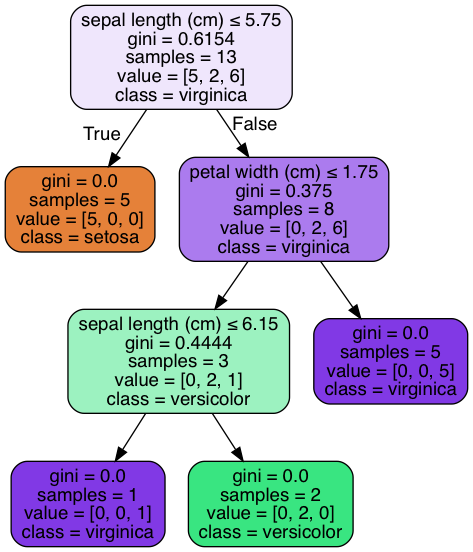

In [11]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())  

## А теперь повторим для большого набора данных

In [12]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [13]:
model.fit(iris_data.iloc[:, :-1], iris_data.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [14]:
dot_data = tree.export_graphviz(model, out_file="big_tree.out", 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

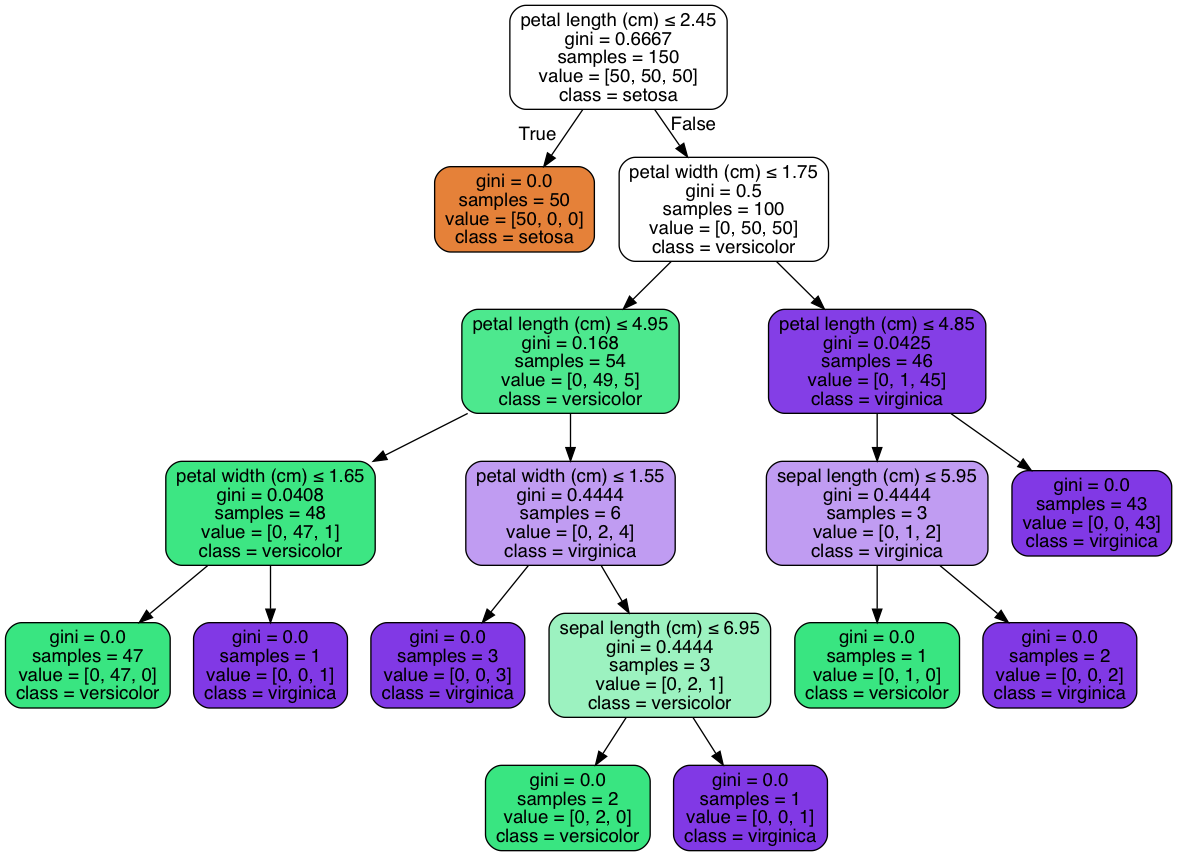

In [15]:
graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())  

## Оценим качество

In [16]:
train_data, test_data, train_target, test_target = train_test_split(iris_data.iloc[:, :-1], iris_data.target,
                                                                   test_size = 0.2)

In [17]:
model.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [18]:
test_predictions = model.predict(test_data)

In [19]:
print test_predictions

[2 0 2 0 0 1 1 1 0 2 1 2 2 1 0 2 2 0 0 1 1 2 1 2 0 2 2 0 0 2]


In [20]:
print test_target.values

[2 0 2 0 0 1 1 1 0 2 1 2 1 2 0 2 2 0 0 1 1 2 1 2 0 2 2 0 0 2]


In [21]:
print accuracy_score(test_target, test_predictions)

0.933333333333


In [22]:
train_predictions = model.predict(train_data)

In [23]:
print accuracy_score(train_target, train_predictions)

1.0


In [24]:
print classification_report(test_target, test_predictions)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.88      0.88      0.88         8
          2       0.92      0.92      0.92        12

avg / total       0.93      0.93      0.93        30



In [25]:
dot_data = tree.export_graphviz(model, out_file="tree.out", 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 

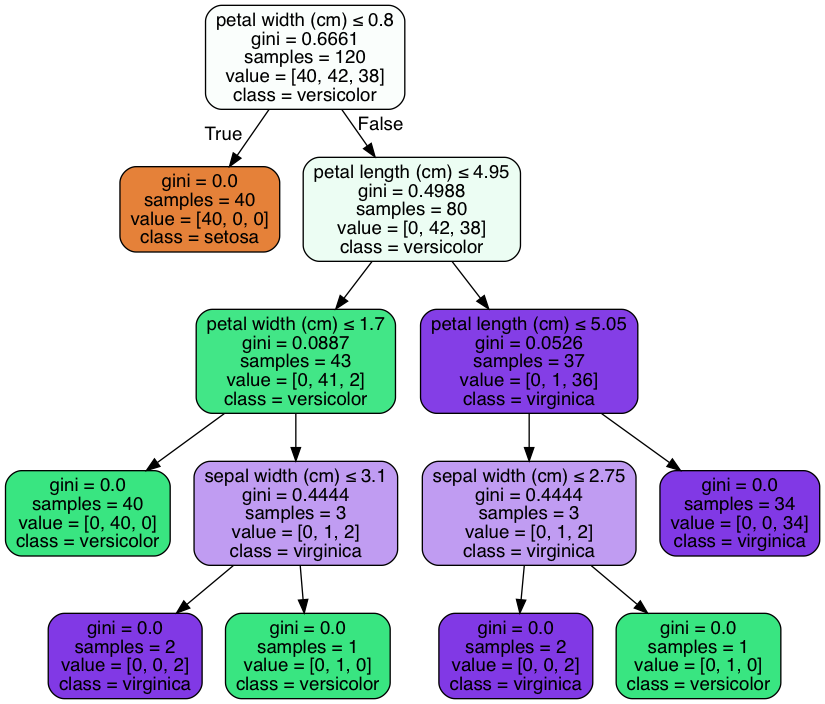

In [26]:
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())  

## Исследуем "устойчивость" модели

**Вариант 1:** деревья, построенные на немного отличающихся подмножествах обучающей выборки

См. пункт 2 в списке недостатков деревьев в документации sklearn: http://scikit-learn.org/stable/modules/tree.html

In [27]:
model = tree.DecisionTreeClassifier(max_depth=4)
print len(train_data)

120


Построим два решающих дерева: одно выкинув из обучающей выборки diff последних примеров, другое - выкинув из нее diff первых примеров.

При diff = 10 (8,3% выборки) структура дерева такая же, при diff = 20 (16,6%) дерево уже выглядит по-другому и, кроме того, есть различия даже в выборе признака в одном из верхних сплитов

In [33]:
diff = 20

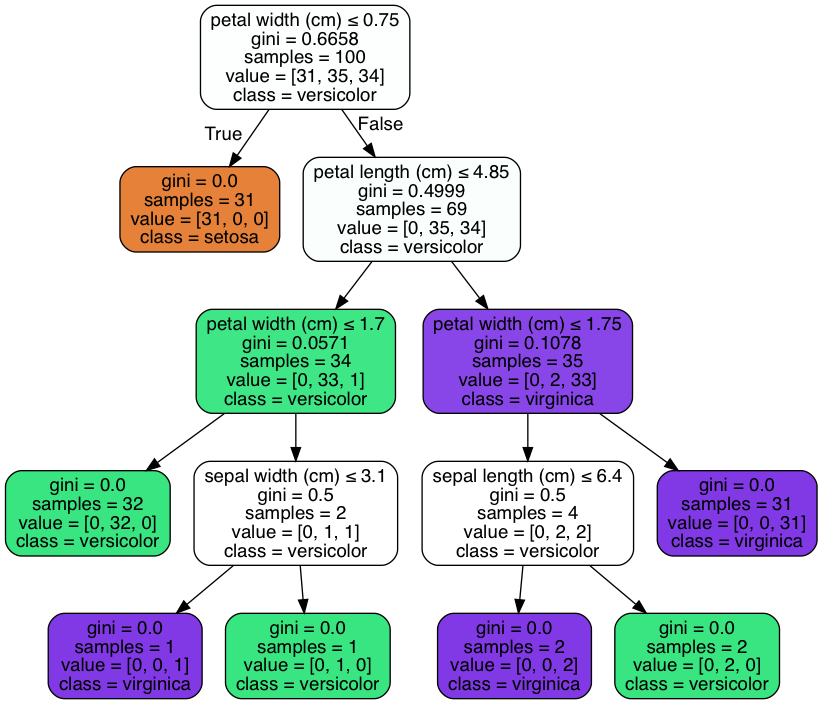

In [34]:
model.fit(train_data[:-20], train_target[:-20])
filename = "first_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

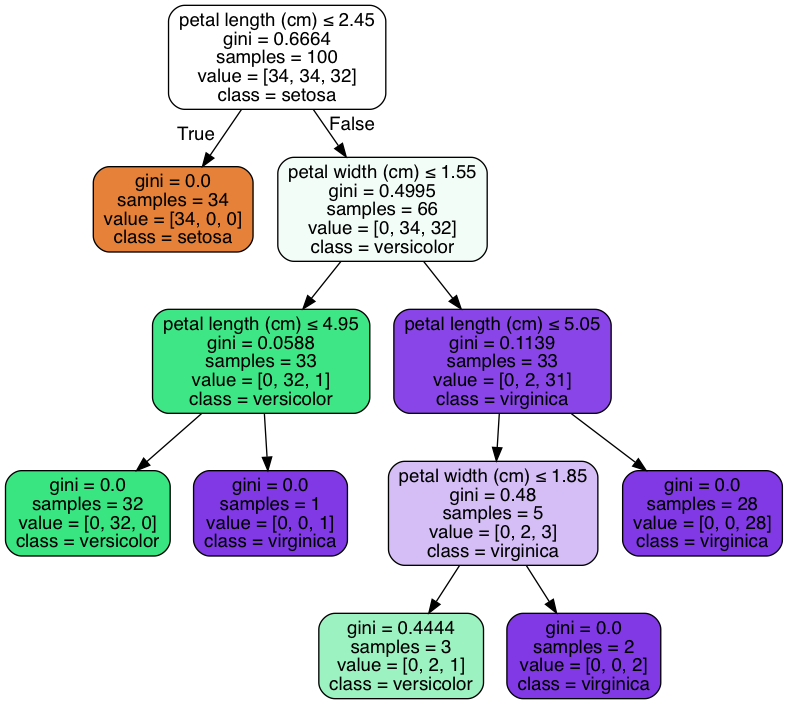

In [35]:
model.fit(train_data[20:], train_target[20:])
filename = "first_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  